# Goodreads: Book Ratings and Recommendations

*Team 4*: ***Suhas Reddy Inturi, Magose Ileleji, Pranali Bakhai, Kamran Arif, Darren Ranck***

**Problem Statement**: *Predicting the rating of a new book based on a specific set of features.*

Our goal is to predict the rating that a book can receive based on a specific set of features. We will use Machine learning models on an extensive dataset scraped from "Goodreads" website to better understand what features impact the ratings the most and thus better predict the ratings.


Dataset link: [Kaggle link](https://www.kaggle.com/jealousleopard/goodreadsbooks)
https://www.kaggle.com/jealousleopard/goodreadsbooks




# New Section

Data Exploration
Data Cleaning
Data Visualisation
Data Preprocessing
Machine Learning Model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')
sns.set_context('paper')
plt.figure(figsize=(15,10))


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  help(format)
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving books.csv to books (1).csv
Help on built-in function format in module builtins:

format(value, format_spec='', /)
    Return value.__format__(format_spec)
    
    format_spec defaults to the empty string.
    See the Format Specification Mini-Language section of help('FORMATTING') for
    details.

User uploaded file "books.csv" with length 1559650 bytes


In [ ]:
books = pd.read_csv("books.csv" , error_bad_lines = False) #Removing parsers in dataset 
books.index=books['bookID']

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [ ]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


In [ ]:
books.shape

(11123, 12)

In [ ]:
books = books.rename(columns={'  num_pages':'num_pages'}) #Removing extra spaces shown in index 7 num_pages in books.info()

In [ ]:
#Replace and rename repetitive/similar elements in dataframe

books = books.replace({'J.K. Rowling/Mary GrandPré':'J. K. Rowling' , 'Scholastic':'Scholastic Inc.' , 'Audiogo':'AudioGo' , 'Ã‰mile Zola/Henri Mitterand':'Amile Zola/Ernest Alfred Vizetelly/Henry Vizetelly' })
books.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J. K. Rowling,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J. K. Rowling,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic Inc.
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J. K. Rowling,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J. K. Rowling,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic Inc.
9,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
10,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic Inc.
12,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
13,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


In [ ]:
#check for duplicated values
books.duplicated().any()

False

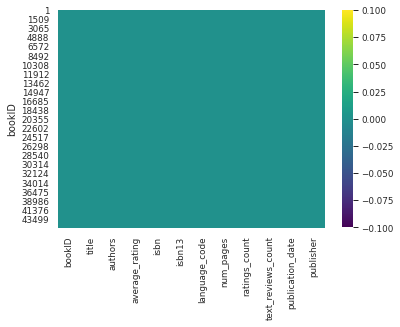

In [ ]:
sns.heatmap(books.isnull(), cmap='viridis');

In [ ]:
duplicate_title_books = books[books.duplicated('title')] #Find duplicated books based on title
duplicate_title_books.head(5)
#realised that books have different language_codes : eng-US and ENG

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
16,16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,0739322206,9780739322208,eng,6,1266,253,3/23/2005,Random House Audio
35,35,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien/Alan Lee,4.50,0618260587,9780618260584,en-US,1216,1618,140,10/1/2002,Houghton Mifflin Harcourt
63,63,The Changeling,Kate Horsley,3.55,1590301943,9781590301944,eng,339,301,43,4/12/2005,Shambhala
68,68,The Known World,Edward P. Jones/Kevin R. Free,3.83,006076273X,9780060762735,en-US,14,55,12,6/15/2004,HarperAudio
69,69,The Known World,Edward P. Jones,3.83,0060749911,9780060749910,eng,576,22,3,6/15/2004,Harper


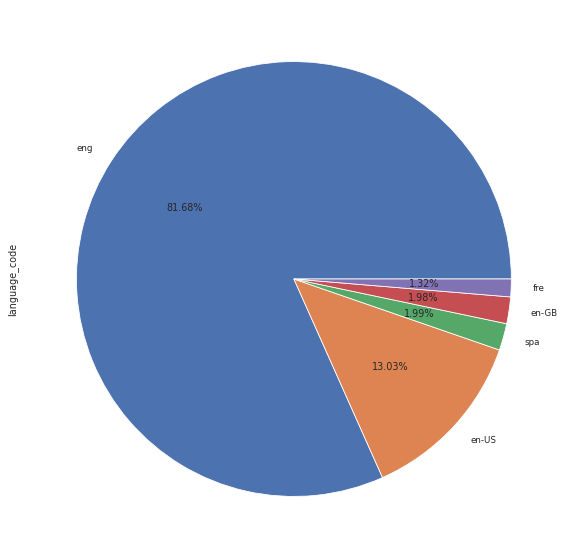

In [77]:
# top 5 languages
plt.figure(figsize=(10,10))
books['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.2f%%')

(10942, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


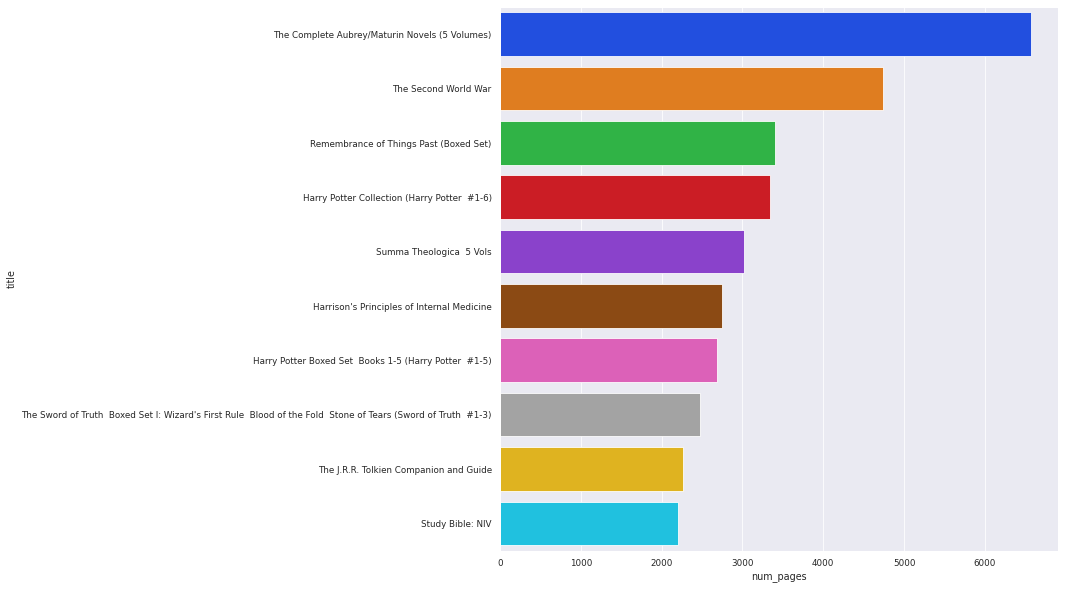

In [81]:
#Top 10 longest books

plt.figure(figsize=(10,10))
most_rated = books.sort_values(by='num_pages', ascending=False).head(10).set_index('title')
sns.barplot(most_rated['num_pages'], most_rated.index, palette='bright');

In [ ]:
#Which publisher has the highest books
books.groupby('publisher')['title'].describe().sort_values('count').tail(10)

,count,unique,top,freq
publisher,,,,
VIZ Media LLC,88,88,Bleach Volume 11,1
Bantam,110,110,Vixen 03 (Dirk Pitt #5),1
Pocket Books,111,109,Sahara (Dirk Pitt #11),2
Harper Perennial,112,111,The Crying of Lot 49,2
HarperCollins,112,111,Charlotte's Web,2
Ballantine Books,144,143,While I Was Gone,2
Mariner Books,150,149,The Best American Mystery Stories 2004,2
Penguin Classics,184,179,The Histories,2
Penguin Books,261,252,Vanity Fair,2


In [ ]:
#Find books with 0 rating_count
books[books['ratings_count']==0].count()
#There are 79 of those
# These books are not required and can be dropped
books.drop(books[books['ratings_count']==0].index, inplace=True)

In [ ]:
#Let's see the books with 5 rating
five_rated = books[books['average_rating']==5][['title','ratings_count']]
five_rated.count()
#There are 17 books which are rated 5

title            17
ratings_count    17
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


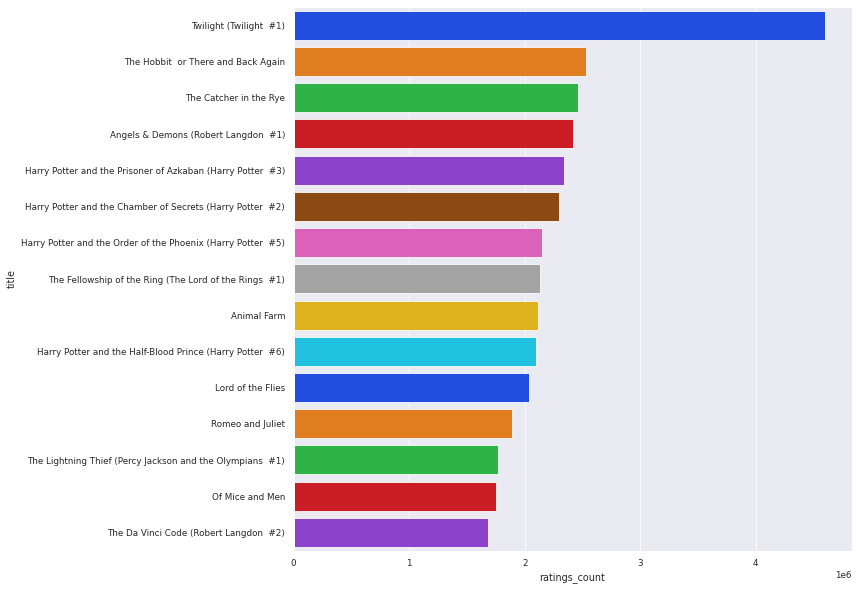

In [ ]:
#Top 10 books with more ratings
plt.figure(figsize=(10,10))
most_rated = books.sort_values('ratings_count', ascending = False).head(15).set_index('title')
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='bright');
#These are top 10 rated books.
#Twilight dominates the list
#Once people start a series, they'll finish it
#People might only read first book and stop

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


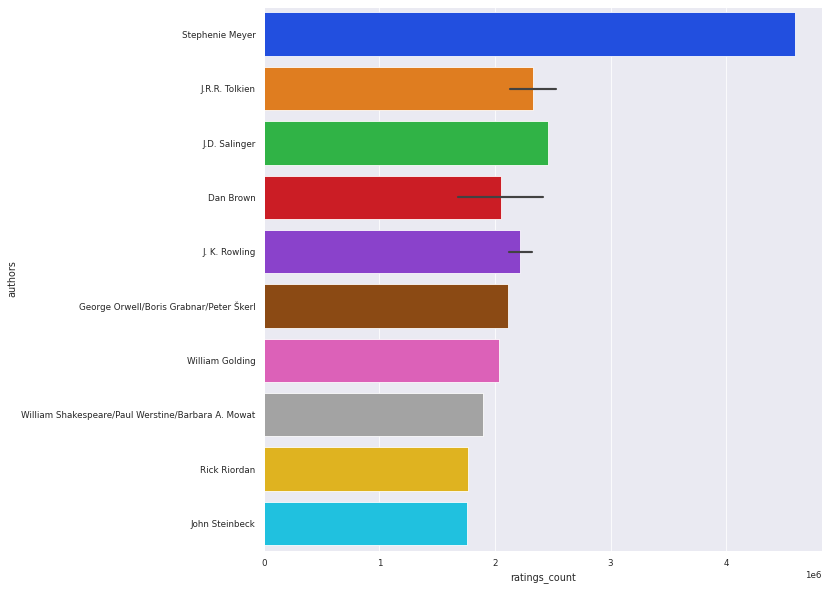

In [ ]:
#Most rated authors
plt.figure(figsize=(10,10))
most_rated = books.sort_values('ratings_count', ascending = False).head(15).set_index('authors')
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='bright');
#Stephenie Meyer(Twilight) has the highest number of ratings given

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


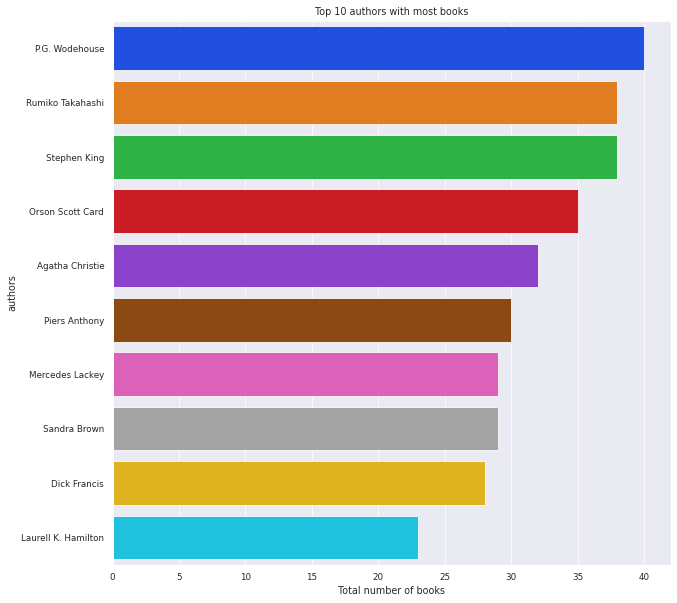

In [ ]:
#Which author wrote most number of books?
most_books = books.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(10,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='bright')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books");

Data Visualization 

<Figure size 1080x720 with 0 Axes>

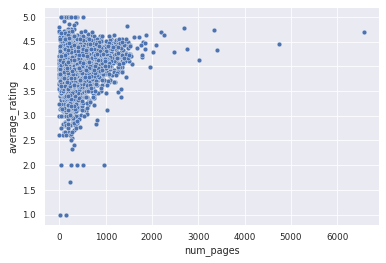

<Figure size 1080x720 with 0 Axes>

In [ ]:
sns.scatterplot(x='num_pages',y='average_rating',data=books)
plt.figure(figsize=(15,10))


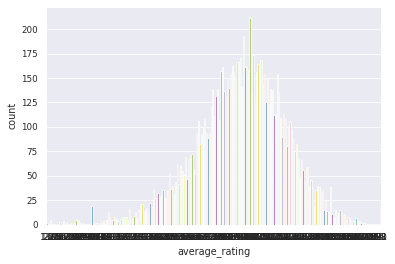

In [ ]:
sns.countplot(x='average_rating', data=books, palette='Set3');

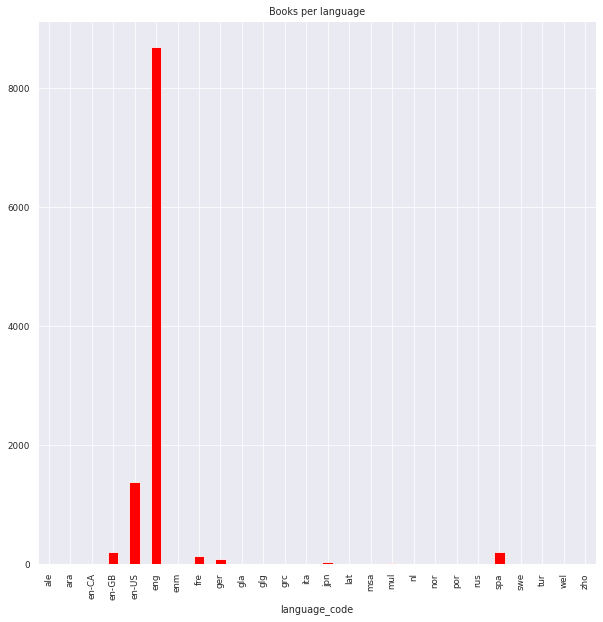

In [ ]:
plt.figure(figsize=(10,10))
books.groupby('language_code')['title'].count().plot.bar(color='red');
plt.title("Books per language");
#Majority of books are in English


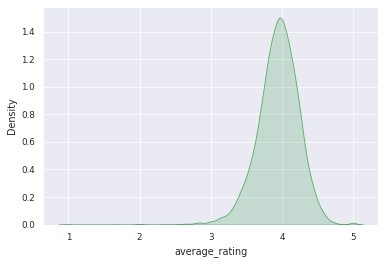

In [ ]:
#Probability density function for average rating
sns.kdeplot(books['average_rating'], shade = True, color='g'); 

The above graph indicates that most of the ratings are concentrated between 3 and 5 and also that the average_rating for most of the books is close to 4

In [ ]:
books['title'].value_counts()[459] #459 books are repeated.

1

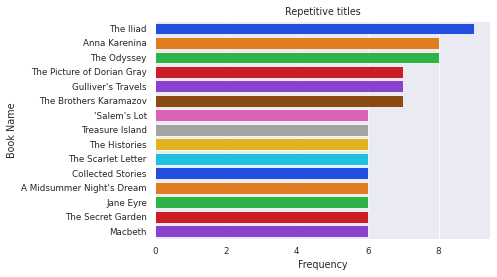

In [ ]:
Titles = books['title'].value_counts()[:15]
sns.barplot(x = Titles, y = Titles.index, palette='bright');
plt.xlabel("Frequency")
plt.ylabel("Book Name")
plt.title("Repetitive titles");

In [ ]:
books[books['title']=='The Brothers Karamazov']

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
4933,4933,The Brothers Karamazov,Fyodor Dostoyevsky/Constance Garnett/Manuel Ko...,4.32,0451527348,9780451527349,eng,736,983,91,6/1/1999,Signet Classics
4934,4934,The Brothers Karamazov,Fyodor Dostoyevsky/Fyodor Dostoevsky/Richard P...,4.32,0374528373,9780374528379,eng,796,191531,6795,6/14/2002,Farrar Straus and Giroux
4935,4935,The Brothers Karamazov,Fyodor Dostoyevsky/David McDuff,4.32,0140449248,9780140449242,eng,1013,1673,184,2/27/2003,Penguin Books Ltd
4936,4936,The Brothers Karamazov,Fyodor Dostoyevsky/Richard Pevear/Larissa Volo...,4.32,0679729259,9780679729259,eng,796,617,80,9/3/1991,Vintage Books USA
4940,4940,The Brothers Karamazov,Fyodor Dostoyevsky/Constance Garnett/Maire Jaanus,4.32,159308045X,9781593080457,eng,720,1089,202,7/25/2004,Barnes Noble Classics
5691,5691,The Brothers Karamazov,Fyodor Dostoyevsky/Richard Pevear/Larissa Volo...,4.32,0099922800,9780099922803,eng,796,443,55,1/16/1992,Vintage Classics
7135,7135,The Brothers Karamazov,Fyodor Dostoyevsky/Andrew R. MacAndrew/Konstan...,4.32,0553212168,9780553212167,eng,1072,1022,154,4/1/1984,Bantam Classics


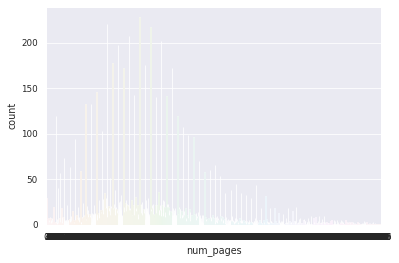

In [ ]:
sns.countplot(x='num_pages', data=books); 

#Can we please add some color to this graph to make it more legible???

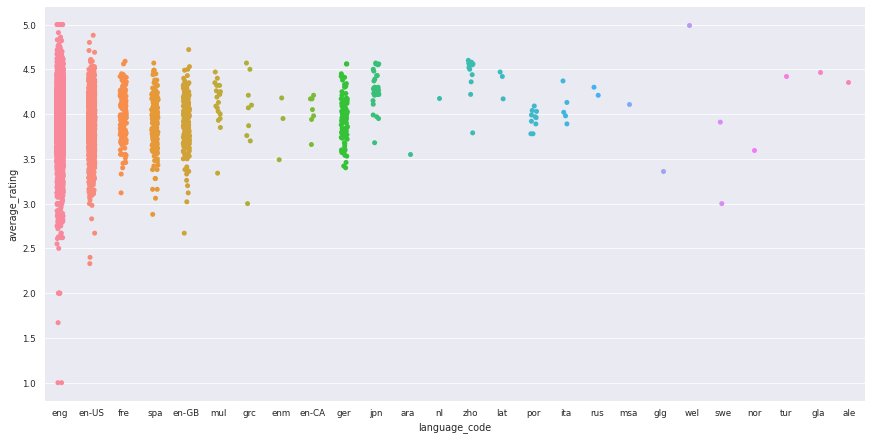

In [ ]:
sns.catplot(x="language_code", y="average_rating" , data=books, height=6, aspect=2);

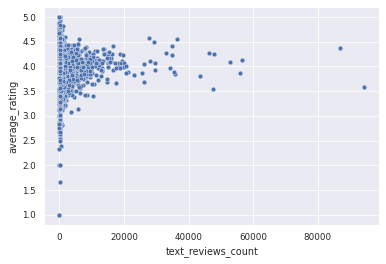

In [ ]:
sns.scatterplot(x='text_reviews_count',y='average_rating',data=books);

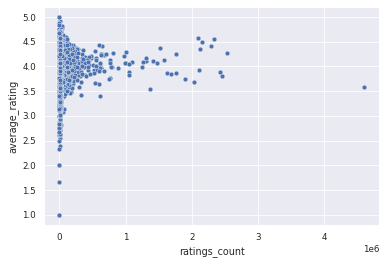

In [ ]:
sns.scatterplot(x='ratings_count',y='average_rating',data=books);     

In [ ]:
books['publication_date'].min()

'1/1/1900'

In [ ]:
books['publication_date'].max()

'9/9/2010'

In [ ]:
publication_date = pd.to_datetime(books['publication_date'], errors='coerce')

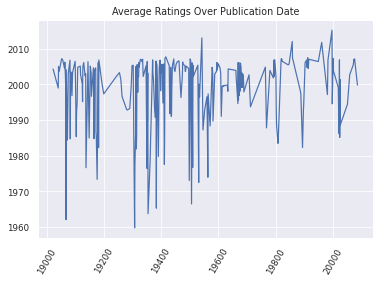

In [ ]:
plt.plot(publication_date.loc['1900-01':'2010-09'])
plt.title('Average Ratings Over Publication Date')
plt.xticks(rotation=60)
plt.show()


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10863 entries, 1 to 45641
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10863 non-null  int64  
 1   title               10863 non-null  object 
 2   authors             10863 non-null  object 
 3   average_rating      10863 non-null  float64
 4   isbn                10863 non-null  object 
 5   isbn13              10863 non-null  int64  
 6   language_code       10863 non-null  object 
 7   num_pages           10863 non-null  int64  
 8   ratings_count       10863 non-null  int64  
 9   text_reviews_count  10863 non-null  int64  
 10  publication_date    10863 non-null  object 
 11  publisher           10863 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.4+ MB
